In [1]:
import pandas as pd
from pandas.plotting import register_matplotlib_converters
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import numpy as np
import matplotlib.patches as mpatches

# Import Elon Musk Tweets

In [2]:
musk_tweets = pd.read_csv('data_elonmusk.csv',encoding='latin1')

In [3]:
musk_tweets.sample(5)

,row ID,Tweet,Time,Retweet from,User
2765,Row2765,Falcon 9 at sunset http://t.co/CeXSwqjVHP,2013-09-19 07:31:39,NaN,elonmusk
1300,Row1300,RT @TeslaMotors: Tesla's first Powerpacks in A...,2016-10-05 06:50:58,Tesla,elonmusk
1392,Row1392,"@abadcliche Most likely true, but we can't yet...",2016-09-09 17:45:08,NaN,elonmusk
2743,Row2743,Mission of Tesla http://t.co/UchbT5NZE3,2013-11-19 16:21:08,NaN,elonmusk
12,Row12,@Fashionista_com @mayemusk Congrats Mom! I lov...,2017-09-28 07:53:52,NaN,elonmusk


In [4]:
#Dropping unecessary columns
musk_tweets.drop(columns = ['Retweet from', 'User'], inplace = True)

In [5]:
musk_tweets['Date'] = pd.to_datetime(musk_tweets['Time']).dt.date
musk_tweets['Time'] = pd.to_datetime(musk_tweets['Time']).dt.time

In [6]:
musk_tweets = musk_tweets.assign(Date=pd.to_datetime(musk_tweets.Date)).drop('Time',axis='columns')

In [7]:
musk_tweets=musk_tweets.drop(['row ID'], axis=1)

In [8]:
musk_tweets=musk_tweets.astype(str)
Tweet_lens=[]
for Tweet in musk_tweets.Tweet:
    Tweet_lens.append(len(Tweet))

In [9]:
musk_tweets_len=pd.DataFrame(Tweet_lens)
musk_tweets_len.columns=['Tweet_length']
musk_tweets=pd.concat([musk_tweets,musk_tweets_len],axis=1)

In [10]:
musk_tweets = musk_tweets[['Date', 'Tweet', 'Tweet_length']]

In [11]:
musk_tweets.head()

,Date,Tweet,Tweet_length
0,2017-09-29,@MeltingIce Assuming max acceleration of 2 to ...,140
1,2017-09-29,RT @SpaceX: BFR is capable of transporting sat...,140
2,2017-09-29,@bigajm Yup :),14
3,2017-09-29,Part 2 https://t.co/8Fvu57muhM,30
4,2017-09-29,Fly to most places on Earth in under 30 mins a...,119


In [12]:
musk_tweets=musk_tweets.groupby(['Date'], as_index = False).agg({'Tweet': ','.join})

# Tweets Cleaning

In [13]:
from nltk.corpus import wordnet
import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ZeWu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ZeWu\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [14]:
def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

def clean_text(text):
    # lower text
    text = text.lower()
    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # pos tag text
    pos_tags = pos_tag(text)
    # lemmatize text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    
    # join all
    text = " ".join(text)
    return(text)

# clean text data
musk_tweets["Text_Clean"] = musk_tweets["Tweet"].apply(lambda x: clean_text(x))
musk_tweets.head()


,Date,Tweet,Text_Clean
0,2012-11-16,RT @Jon_Favreau: My Model S just arrived and I...,rt jon_favreau model arrive go electric like d...
1,2012-11-19,Just returned from a trip to London and Oxford...,return trip london oxford meet many interestin...
2,2012-11-20,"Btw, I don't think Apple is doomed. Just won't...",btw think apple doom unseat google place larry...
3,2012-11-21,"@Thomas_Tregner Exactly!,Love this picture of ...","thomas_tregner exactly!,love picture curiousit..."
4,2012-11-22,RT @neokoenig: @elonmusk if anyone has issues ...,rt neokoenig elonmusk anyone issue access vide...


In [15]:
from textblob import TextBlob
def sentiment(x):
    sentValue = TextBlob(x)
    return sentValue.sentiment.polarity

musk_tweets['sentiment'] = musk_tweets['Text_Clean'].apply(sentiment)

conditions = [
    (musk_tweets['sentiment'] > 0 ),
    (musk_tweets['sentiment'] < 0),
    (musk_tweets['sentiment'] == 0)]

choices = ['positive', 'negative', 'neutral']
musk_tweets['Pol_Name'] = np.select(conditions, choices, default=' ')

In [16]:

musk_tweets

,Date,Tweet,Text_Clean,sentiment,Pol_Name
0,2012-11-16,RT @Jon_Favreau: My Model S just arrived and I...,rt jon_favreau model arrive go electric like d...,0.000000,neutral
1,2012-11-19,Just returned from a trip to London and Oxford...,return trip london oxford meet many interestin...,0.400000,positive
2,2012-11-20,"Btw, I don't think Apple is doomed. Just won't...",btw think apple doom unseat google place larry...,0.294792,positive
3,2012-11-21,"@Thomas_Tregner Exactly!,Love this picture of ...","thomas_tregner exactly!,love picture curiousit...",0.000000,neutral
4,2012-11-22,RT @neokoenig: @elonmusk if anyone has issues ...,rt neokoenig elonmusk anyone issue access vide...,0.350000,positive
...,...,...,...,...,...
887,2017-09-25,"@Daimler Good,Major improvements & some unexpe...","daimler good,major improvement unexpected appl...",0.100000,positive
888,2017-09-26,"@El_Deano @Daimler @Jalopnik Yes, I did :),Goo...",el_deano daimler jalopnik yes good nyt article...,0.350000,positive
889,2017-09-27,Prev ideas for paying ~$10B dev cost incl. Kic...,prev idea pay dev cost incl kickstarter collec...,0.138853,positive
890,2017-09-28,"@kevinroose Just another day in the office,@Fa...","kevinroose another day office,@fashionista_com...",0.500000,positive


(-0.5, 1439.5, 1079.5, -0.5)

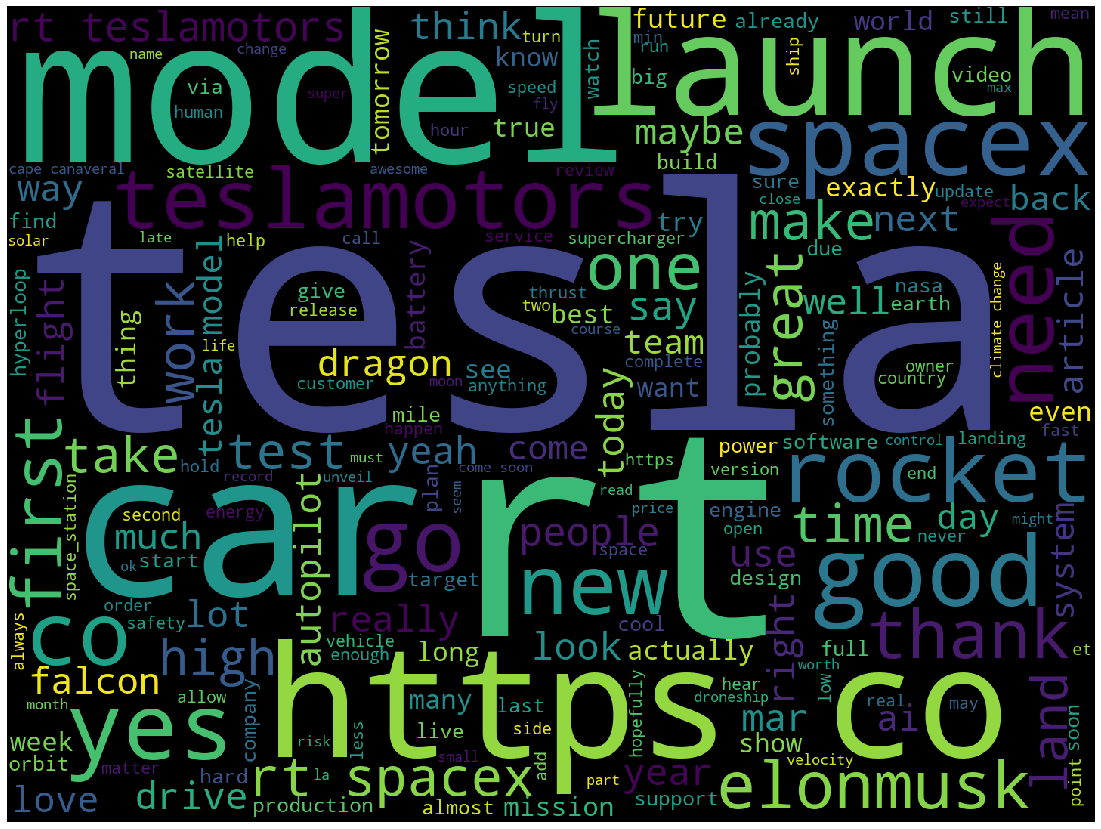

In [17]:
# Plot the word cloud
from wordcloud import WordCloud
cloud = WordCloud(width=1440, height=1080).generate(str(musk_tweets.Text_Clean.astype(str).values))
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off')

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [19]:
ngram_vect = TfidfVectorizer(ngram_range = (1,2))
musk_tweets['tf_idf'] = ngram_vect.fit_transform(musk_tweets["Text_Clean"])

In [20]:
musk_tweets.head()

,Date,Tweet,Text_Clean,sentiment,Pol_Name,tf_idf
0,2012-11-16,RT @Jon_Favreau: My Model S just arrived and I...,rt jon_favreau model arrive go electric like d...,0.000000,neutral,"(0, 25381)\t0.2065331829017821\n (0, 8797)\..."
1,2012-11-19,Just returned from a trip to London and Oxford...,return trip london oxford meet many interestin...,0.400000,positive,"(0, 25381)\t0.2065331829017821\n (0, 8797)\..."
2,2012-11-20,"Btw, I don't think Apple is doomed. Just won't...",btw think apple doom unseat google place larry...,0.294792,positive,"(0, 25381)\t0.2065331829017821\n (0, 8797)\..."
3,2012-11-21,"@Thomas_Tregner Exactly!,Love this picture of ...","thomas_tregner exactly!,love picture curiousit...",0.000000,neutral,"(0, 25381)\t0.2065331829017821\n (0, 8797)\..."
4,2012-11-22,RT @neokoenig: @elonmusk if anyone has issues ...,rt neokoenig elonmusk anyone issue access vide...,0.350000,positive,"(0, 25381)\t0.2065331829017821\n (0, 8797)\..."


In [21]:
print('total tweets', len(musk_tweets))
print('positive tweets', sum(musk_tweets['Pol_Name'] == 'positive')/len(musk_tweets)*100, '%')
print('negative tweets', sum(musk_tweets['Pol_Name'] == 'negative')/len(musk_tweets)*100, '%')
print('neutral tweets',sum(musk_tweets['Pol_Name'] == 'neutral')/len(musk_tweets)*100, '%')

total tweets 892
positive tweets 65.91928251121077 %
negative tweets 11.995515695067265 %
neutral tweets 22.08520179372197 %


In [22]:
data = pd.read_csv('TSLA.csv')

In [23]:
df = pd.merge(musk_tweets, data, on=['Date'])

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 633 entries, 0 to 632
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        633 non-null    object 
 1   Tweet       633 non-null    object 
 2   Text_Clean  633 non-null    object 
 3   sentiment   633 non-null    float64
 4   Pol_Name    633 non-null    object 
 5   tf_idf      633 non-null    object 
 6   Open        633 non-null    float64
 7   High        633 non-null    float64
 8   Low         633 non-null    float64
 9   Close       633 non-null    float64
 10  Adj Close   633 non-null    float64
 11  Volume      633 non-null    int64  
dtypes: float64(6), int64(1), object(5)
memory usage: 64.3+ KB


In [25]:
df = pd.DataFrame(df)

#sort dataframe
df = df.sort_values(by='Date')

In [26]:
df.head()

,Date,Tweet,Text_Clean,sentiment,Pol_Name,tf_idf,Open,High,Low,Close,Adj Close,Volume
0,2012-11-16,RT @Jon_Favreau: My Model S just arrived and I...,rt jon_favreau model arrive go electric like d...,0.000000,neutral,"(0, 25381)\t0.2065331829017821\n (0, 8797)\...",31.150000,32.000000,30.590000,31.840000,31.840000,908700
1,2012-11-19,Just returned from a trip to London and Oxford...,return trip london oxford meet many interestin...,0.400000,positive,"(0, 25381)\t0.2065331829017821\n (0, 8797)\...",32.070000,33.250000,31.840000,32.919998,32.919998,1392400
2,2012-11-20,"Btw, I don't think Apple is doomed. Just won't...",btw think apple doom unseat google place larry...,0.294792,positive,"(0, 25381)\t0.2065331829017821\n (0, 8797)\...",32.799999,33.099998,31.910000,33.000000,33.000000,922500
3,2012-11-21,"@Thomas_Tregner Exactly!,Love this picture of ...","thomas_tregner exactly!,love picture curiousit...",0.000000,neutral,"(0, 25381)\t0.2065331829017821\n (0, 8797)\...",32.610001,33.470001,32.290001,32.470001,32.470001,963200
4,2012-11-23,My talk for the Royal Aeronautical Society is ...,talk royal aeronautical society online get lit...,0.079167,positive,"(0, 25381)\t0.2065331829017821\n (0, 8797)\...",32.599998,32.830002,31.700001,32.130001,32.130001,430300


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsRegressor
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn import preprocessing

In [28]:
y=df['Close']
X=df[['sentiment']]

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                        test_size=0.3, random_state=42)


In [30]:
import math
from sklearn.metrics import mean_squared_error


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_predict, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
from xgboost import XGBRegressor

In [32]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

print("Linear Reg R^2 training is: {}".format(mean_squared_error(X_train, y_train)))
print("Linear Reg R^2 testing is: {}".format(mean_squared_error(X_test, y_test)))
print("Linear Reg Train RMSE is: {}".format(np.sqrt(mean_squared_error(y_train, linear_reg.predict(X_train)))))
print("Linear Reg Test RMSE is: {}".format(np.sqrt(mean_squared_error(y_test, linear_reg.predict(X_test)))))

Linear Reg R^2 training is: 0.00039088811953003066
Linear Reg R^2 testing is: -0.0019711951518501802
Linear Reg Train RMSE is: 82.76988656095769
Linear Reg Test RMSE is: 84.77667534441315
